In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from collections import Counter
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
import string


In [3]:
tweets = pd.read_csv('realDonaldTrump_tweets.csv',encoding='latin1')

tweets.source.value_counts()
#tweets.shape

Twitter for iPhone     2551
Twitter for Android     438
Media Studio            127
Twitter Web Client       62
Twitter Ads              34
Twitter for iPad         29
Periscope                 1
Name: source, dtype: int64

In [4]:
tweets_android = tweets[tweets.source.str.contains('Media Studio') | tweets.source.str.contains('Twitter for Android')]
tweets_iphone = tweets[tweets.source.str.contains('Twitter for iPhone')]
tweets_android['created_at'] = pd.to_datetime(tweets_android['created_at'])
tweets_iphone['created_at'] = pd.to_datetime(tweets_iphone['created_at'])




/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [5]:
print(tweets_android.RT.mean(),tweets_iphone.RT.mean())

print(tweets_android.fav.mean(),tweets_iphone.fav.mean())

21975.2283186 18529.0693846
91386.6761062 72617.3379067


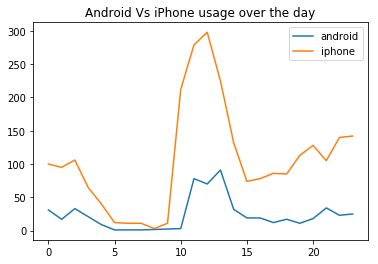

In [6]:
#Tweeter usage over the day between iphone and android

android = dict(Counter(np.array(tweets_android.created_at.dt.hour)))
iphone = dict(Counter(np.array(tweets_iphone.created_at.dt.hour)))

#sns.distplot(android,color='red',bins=24)
#sns.distplot(iphone,color='blue',bins=24)
#plt.hist(i,color='blue')

androidLists = sorted(android.items()) # sorted by key, return a list of tuples
iphoneLists = sorted(iphone.items())

androidX, androidY = zip(*androidLists) # unpack a list of pairs into two tuples
iphoneX, iphoneY = zip(*iphoneLists)

plt.plot(androidX, androidY)
plt.plot(iphoneX,iphoneY)
plt.title('Android Vs iPhone usage over the day')
plt.legend(['android','iphone'])
plt.show()

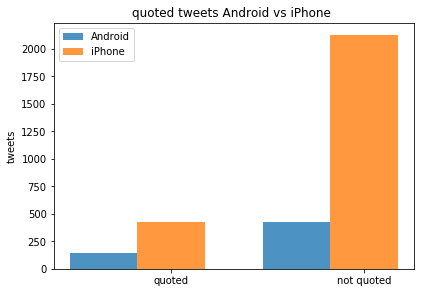

In [7]:
#android tweets
qat = tweets_android[tweets_android.text.str.contains('"')]
nqat = tweets_android[~tweets_android.text.str.contains('"')]
at = (len(qat),len(nqat))

#iphone tweets
qit = tweets_iphone[tweets_iphone.text.str.contains('"')]
nqit = tweets_iphone[~tweets_iphone.text.str.contains('"')]
it = (len(qit),len(nqit))

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
rectsA = plt.bar(index,at,bar_width,alpha=0.8, label="Android")
rectsB = plt.bar(index+bar_width,it,bar_width,alpha=0.8, label="iPhone")
plt.ylabel('tweets'),
plt.xticks(index + bar_width, ('quoted', 'not quoted'))
plt.legend()
plt.tight_layout()
plt.title('quoted tweets Android vs iPhone ')
plt.show()

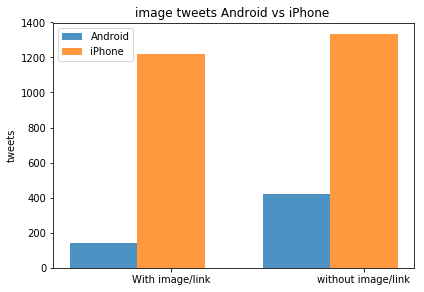

In [8]:
#android tweets
lat = tweets_android[tweets_android.text.str.contains('t.co')]
nlat = tweets_android[~tweets_android.text.str.contains('t.co')]
at = (len(lat),len(nlat))

#iphone tweets
lit = tweets_iphone[tweets_iphone.text.str.contains('t.co')]
nlit = tweets_iphone[~tweets_iphone.text.str.contains('t.co')]
it = (len(lit),len(nlit))

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
rectsA = plt.bar(index,at,bar_width,alpha=0.8, label="Android")
rectsB = plt.bar(index+bar_width,it,bar_width,alpha=0.8, label="iPhone")
plt.ylabel('tweets'),
plt.xticks(index + bar_width, ('With image/link', 'without image/link'))
plt.legend()
plt.tight_layout()
plt.title('image tweets Android vs iPhone ')
plt.show()

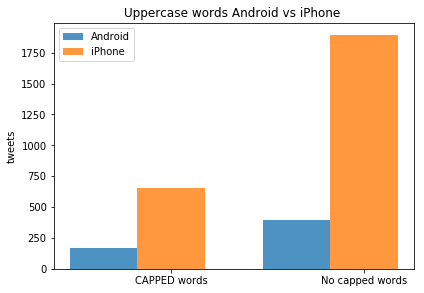

In [9]:

#android tweets
lat = tweets_android[tweets_android.text.str.contains(r'\b[A-Z]{4,}\b')]
nlat = tweets_android[~tweets_android.text.str.contains(r'\b[A-Z]{4,}\b')]
at = (len(lat),len(nlat))

#iphone tweets
lit = tweets_iphone[tweets_iphone.text.str.contains(r'\b[A-Z]{4,}\b')]
nlit = tweets_iphone[~tweets_iphone.text.str.contains(r'\b[A-Z]{4,}\b')]
it = (len(lit),len(nlit))

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
rectsA = plt.bar(index,at,bar_width,alpha=0.8, label="Android")
rectsB = plt.bar(index+bar_width,it,bar_width,alpha=0.8, label="iPhone")
plt.ylabel('tweets')
plt.xticks(index + bar_width, ('CAPPED words', 'No capped words'))
plt.legend()
plt.tight_layout()
plt.title('Uppercase words Android vs iPhone ')
plt.show()

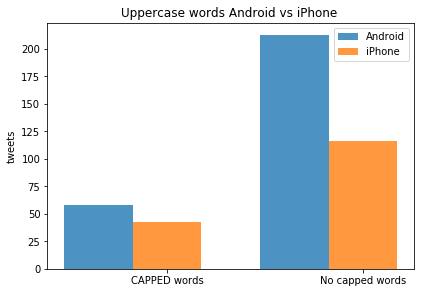

In [10]:
#android tweets
lat = tweets_android[tweets_android.text.str.contains(r'\b[A-Z]{4,}\b')]
nlat = tweets_android[~tweets_android.text.str.contains(r'\b[A-Z]{4,}\b')]
at = (len(lat[lat.created_at < '2017-01-20']),len(nlat[nlat.created_at < '2017-01-20']))

#iphone tweets
lit = tweets_iphone[tweets_iphone.text.str.contains(r'\b[A-Z]{4,}\b')]
nlit = tweets_iphone[~tweets_iphone.text.str.contains(r'\b[A-Z]{4,}\b')]
it = (len(lit[lit.created_at < '2017-01-20']),len(nlit[nlit.created_at < '2017-01-20']))

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
rectsA = plt.bar(index,at,bar_width,alpha=0.8, label="Android")
rectsB = plt.bar(index+bar_width,it,bar_width,alpha=0.8, label="iPhone")
plt.ylabel('tweets')
plt.xticks(index + bar_width, ('CAPPED words', 'No capped words'))
plt.legend()
plt.tight_layout()
plt.title('Uppercase words Android vs iPhone ')
plt.show()

/home/nick/.local/lib/python3.5/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/home/nick/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


<function matplotlib.pyplot.show>

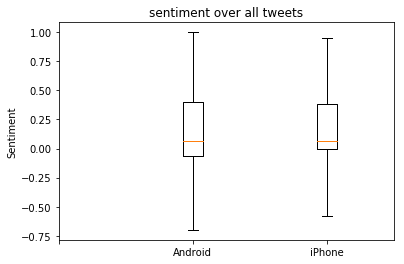

In [11]:
#sentiment analysis based on textblob sentiment
from textblob import TextBlob

tweets_android[['polarity', 'subjectivity']] = tweets_android.text.apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
tweets_iphone[['polarity', 'subjectivity']] = tweets_iphone.text.apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

fig, ax = plt.subplots()
ax.boxplot([tweets_android.polarity,tweets_iphone.polarity], showfliers=False)
plt.ylabel('Sentiment')
plt.xticks(np.arange(3),('','Android','iPhone'))
plt.title('sentiment over all tweets')
plt.show


/home/nick/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


<function matplotlib.pyplot.show>

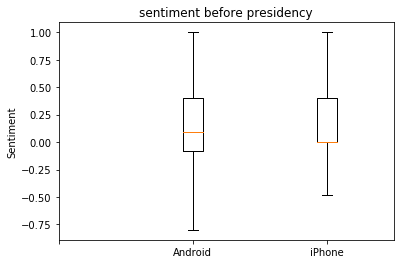

In [12]:
fig, ax = plt.subplots()
ax.boxplot([tweets_android[tweets_android.created_at < '2017-01-20'].polarity,tweets_iphone[tweets_iphone.created_at < '2017-01-20'].polarity], showfliers=False)
plt.ylabel('Sentiment')
plt.xticks(np.arange(3),('','Android','iPhone'))
plt.title('sentiment before presidency')
plt.show

/home/nick/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


<function matplotlib.pyplot.show>

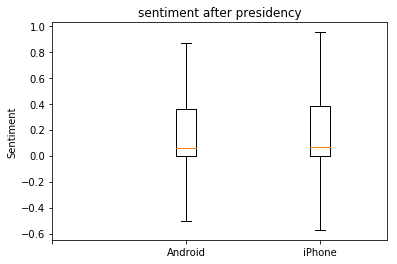

In [13]:
fig, ax = plt.subplots()
ax.boxplot([tweets_android[tweets_android.created_at > '2017-01-20'].polarity,tweets_iphone[tweets_iphone.created_at > '2017-01-20'].polarity], showfliers=False)
plt.ylabel('Sentiment')
plt.xticks(np.arange(3),('','Android','iPhone'))
plt.title('sentiment after presidency')
plt.show

/home/nick/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


<function matplotlib.pyplot.show>

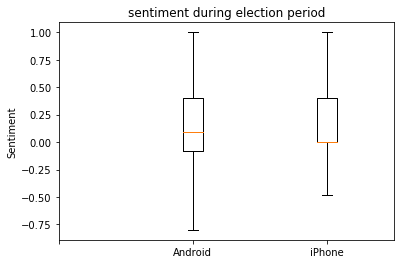

In [14]:
ig, ax = plt.subplots()
ax.boxplot([tweets_android[(tweets_android.created_at > '2016-01-01')&(tweets_android.created_at < '2017-01-20')].polarity,tweets_iphone[(tweets_iphone.created_at > '2016-01-01')&(tweets_iphone.created_at < '2017-01-20')].polarity], showfliers=False)
plt.ylabel('Sentiment')
plt.xticks(np.arange(3),('','Android','iPhone'))
plt.title('sentiment during election period')
plt.show

In [15]:
#wordcount


words_android = str(tweets_android.text)
words_android = " ".join(re.findall("\w+", words_android))

words_iphone = str(tweets_iphone.text)
words_iphone = " ".join(re.findall("\w+", words_iphone))


stop = set(stopwords.words('english'))



android = Counter([i for i in word_tokenize(words_android.lower()) if i not in stop]).most_common(10)
iphone = Counter([i for i in word_tokenize(words_iphone.lower()) if i not in stop]).most_common(10)


In [16]:
print(iphone)

[('b', 60), ('thank', 7), ('join', 6), ('rt', 5), ('xe2', 5), ('https', 4), ('country', 4), ('obama', 4), ('x80', 4), ('great', 4)]


In [17]:
tweets_android[tweets_android.created_at < '2016-01-20'].shape

(0, 9)

In [18]:
tweets_iphone[tweets_iphone.created_at > '2017-01-20'].shape

(2392, 9)

In [19]:
# wordjes = 
words_android = str(tweets_android.text)
words_android = TextBlob(" ".join(re.findall("\w+", words_android)))
Counter(words_android.words).most_common(10)

[('b', 60),
 ('the', 19),
 ('to', 16),
 ('of', 9),
 ('I', 9),
 ('a', 8),
 ('in', 7),
 ('and', 7),
 ('we', 7),
 ('will', 6)]

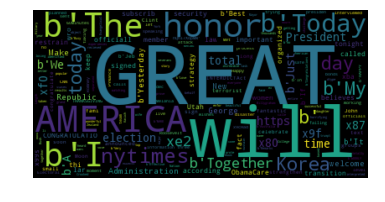

In [25]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(str(tweets_android.text))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
plt.figure()
plt.show()
